## Project : Jeopardy(Quiz) Winning Strategies (Chisquare implementation)

#### Objective - Jeopardy is a popular TV show in the US where participants answer questions to win money. In this project we will figure out patterns in the Historical Question dataset to form strategies to win. 

#### Dataset locations

https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file

### Exploring the Dataset

In [1]:
import pandas as pd
jeopardy = pd.read_csv('jeopardy.csv')

In [2]:
jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [3]:
print(jeopardy.columns)

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')


#### Thus we can see that there are whitespaces in the column names, which we can remove

In [4]:
test_list = list(jeopardy.columns)

In [5]:
test_list_2 = [col_name.strip() for col_name in test_list]

In [6]:
test_list_2

['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question', 'Answer']

In [7]:
jeopardy.columns = test_list_2
print(jeopardy.columns)

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


In [8]:
jeopardy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Show Number  19999 non-null  int64 
 1   Air Date     19999 non-null  object
 2   Round        19999 non-null  object
 3   Category     19999 non-null  object
 4   Value        19999 non-null  object
 5   Question     19999 non-null  object
 6   Answer       19999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


 ### Normalizing Text Column Data

#### The idea is to ensure that we put words in lowercase and remove punctuation so Don't and don't aren't considered to be different words when we compare them.

In [9]:
### Creating a function to normalize Questions and Answers


def normalize(string):
    import re
    
    string = string.lower()
    string = re.sub("[^A-Za-z0-9\s]", "", string)
    
    return string

In [10]:
# Testing the function with a test string
test_str = "Gfg, is best : for ! Geeks ;"
normalize(test_str)

'gfg is best  for  geeks '

In [11]:
jeopardy['clean_question'] = jeopardy['Question'].apply(normalize)
jeopardy['clean_answer'] = jeopardy['Answer'].apply(normalize)

In [12]:
#Checking for any remaining upper case or punctuations
pattern_upper = '[A-Z]'
pattern_punct = '[^A-Za-z0-9\s]'

In [13]:
jeopardy['clean_question'].str.contains(pattern_upper).sum()

0

In [14]:
jeopardy['clean_question'].str.contains(pattern_punct).sum()

0

In [15]:
jeopardy['clean_answer'].str.contains(pattern_upper).sum()

0

In [16]:
jeopardy['clean_answer'].str.contains(pattern_punct).sum()

0

 ### Normalizing 'Value' Column Data

In [17]:
import re
def normalize_values(text):
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    try:
        text = int(text)
    except Exception:
        text = 0
    return text

In [18]:
normalize_values('$200')

200

In [19]:
jeopardy['clean_value'] = jeopardy['Value'].apply(normalize_values)

In [20]:
jeopardy['clean_value'].astype(str).str.contains(pattern_punct).sum()

0

#### Thus we have created 3 new columns that contain clean data from the columns - Question, Answer and Value. 

### Normalizing 'Air Date' column

In [21]:
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])

In [22]:
jeopardy.dtypes

Show Number                int64
Air Date          datetime64[ns]
Round                     object
Category                  object
Value                     object
Question                  object
Answer                    object
clean_question            object
clean_answer              object
clean_value                int64
dtype: object

### Answers in Questions

In order to figure out whether to study past questions, study general knowledge, or not study it all, it would be helpful to figure out two things:

1. How often the answer can be used for a question.
2. How often questions are repeated.

In [23]:
jeopardy['split_question'] = jeopardy['clean_question'].str.split(' ')

In [24]:
jeopardy = jeopardy.drop('split_question', axis = 1)

In [25]:
jeopardy.columns

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer', 'clean_question', 'clean_answer', 'clean_value'],
      dtype='object')

In [26]:
def compare(row):
    split_answer = row['clean_answer'].split(' ')
    split_question = row['clean_question'].split(' ')
    
    match_count = 0
    
    if 'the' in split_answer:
        split_answer.remove('the')
    
    if len(split_answer) == 0:
        return 0

    for word in split_answer:
        if word in split_question:
            match_count +=1
    perc_words_match_q = match_count/len(split_answer)

    return perc_words_match_q

In [27]:
## Testing the function

compare(jeopardy.iloc[0])

0.0

In [28]:
jeopardy['answer_in_question'] = jeopardy.apply(compare,axis = 1)

<AxesSubplot:ylabel='Frequency'>

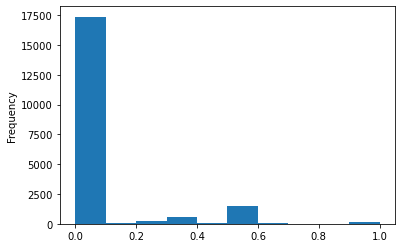

In [29]:
jeopardy['answer_in_question'].plot.hist()

In [30]:
jeopardy['answer_in_question'].mean()*100

6.049325706933591

#### Thus we can observe that on an average, the answer contains 6.04% matching words with the question. Hence we cannot pursue this strategy of relying on the questions for the answer. 

### Recycled Questions

#### Investigating how often new questions are repeats of older ones

#### We will iterate chronologically through the dataset, and create a set of all unique words as well as compare the current question with the set of older words for overlap. 

In [31]:
question_overlap = []
terms_used = set()

jeopardy = jeopardy.sort_values(by = 'Air Date')


for index,row in jeopardy.iterrows():
    split_question = row['clean_question'].split(' ')
    split_question = [x for x in split_question if len(x) >6] ### Removing words that are less than 6 chars in length
    
    ### We check the current row first and then add the words to the set, 
    ### so that the check for overlap happens before the set is updated
    
    match_count = 0
    for word in split_question:
        if word in terms_used:
            match_count+=1
    
    for word in split_question:
        terms_used.add(word)
    
    if len(split_question)>0:
        match_count /= len(split_question)
    
    question_overlap.append(match_count)
    
jeopardy['question_overlap'] = question_overlap

print(jeopardy['question_overlap'].mean()) 

0.6218496503380544


In [32]:
### Attempting the same using DataFrame.apply()

question_overlap = []
terms_used = set()

jeopardy = jeopardy.sort_values(by = 'Air Date')

def past_question(row):
    split_question = row['clean_question'].split(' ')
    split_question = [x for x in split_question if len(x) > 6]
    
    match_count = 0
    for word in split_question:
        if word in terms_used:
            match_count+=1
    
    for word in split_question:
        terms_used.add(word)
    
    if len(split_question)>0:
        match_count /= len(split_question)
    
    
    return match_count



In [33]:
jeopardy['question_overlap_2'] = jeopardy.apply(past_question, axis = 1)

In [34]:
print(jeopardy['question_overlap_2'].mean()) 

0.6218292555454205


#### Thus we can observe that subsequent questions have overlap with previous questions, and the average overlap is 62.18%. Therefore, we can advise any candidate to refer to the earlier questions and prepare in order to have a greater chance of success. Even though this applies only for single term comparision and not phrases, this approach is worth looking into. 

### Low Value vs High Value Questions

#### We will prioritize high value (more than \$800) questions, test the significance of relationships between the terms with high/low value questions through a chi-square test. 

#### First we will create a column 'value', which will indicate whether a question is high-value or low-value

In [35]:
def low_high_value(row):
    if row['clean_value'] > 800:
        value = 1
    else:
        value = 0
    return value

In [36]:
jeopardy['high_value'] = jeopardy.apply(low_high_value, axis = 1)

In [37]:
jeopardy['high_value'].value_counts()

0    14265
1     5734
Name: high_value, dtype: int64

In [38]:
#Creating a function to get the observed counts for a word across low value and high value questions

def low_high_count(word):
    low_count = 0
    high_count = 0
    
    for index,row in jeopardy.iterrows():
        split_question = row['clean_question'].split(' ')
        if word in split_question:
            if row['high_value'] == 1:
                high_count +=1
            else:
                low_count +=1
    return high_count, low_count        

In [39]:
low_high_count('formosa')

(1, 2)

In [40]:
import random # To randomly select 10 words to check
comparision_terms = []

for i in range(10):
    comparision_terms.append(random.choice(list(terms_used)))

In [41]:
comparision_terms

['hrefhttpwwwjarchivecommedia20091124dj25ajpg',
 'hopkins',
 'frenchman',
 'announce',
 'expectancy',
 'akiapolaau',
 'million',
 'netherworld',
 'belarus',
 'melbourne']

In [42]:
observed_counts = []
for term in comparision_terms:
    observed_counts.append(low_high_count(term))

In [43]:
observed_counts

[(1, 0),
 (0, 5),
 (5, 7),
 (1, 2),
 (0, 1),
 (0, 1),
 (41, 79),
 (0, 1),
 (1, 2),
 (0, 2)]

In [44]:
#Creating a function to get the expected counts for a word across low value and high value questions

def low_high_count_expected(word):
    high_count_obs, low_count_obs = low_high_count(word)
    
    total_count_obs = high_count_obs + low_count_obs
    
    total_questions = jeopardy['high_value'].value_counts().sum()
    high_value_perc = jeopardy['high_value'].value_counts()[1]/total_questions
    low_value_perc = jeopardy['high_value'].value_counts()[0]/total_questions
    
    expected_high_count = total_count_obs*high_value_perc
    expected_low_count = total_count_obs*low_value_perc
    
    
    return expected_high_count, expected_low_count

In [45]:
expected_counts = []
for term in comparision_terms:
    expected_counts.append(low_high_count_expected(term)) 

In [46]:
expected_counts

[(0.28671433571678584, 0.7132856642832142),
 (1.4335716785839292, 3.566428321416071),
 (3.44057202860143, 8.55942797139857),
 (0.8601430071503575, 2.1398569928496425),
 (0.28671433571678584, 0.7132856642832142),
 (0.28671433571678584, 0.7132856642832142),
 (34.4057202860143, 85.5942797139857),
 (0.28671433571678584, 0.7132856642832142),
 (0.8601430071503575, 2.1398569928496425),
 (0.5734286714335717, 1.4265713285664283)]

In [47]:
from scipy.stats import chisquare
chi_squared = []

for i in range(10):
   
    chisq_results = chisquare(observed_counts[i],expected_counts[i])
    chi_squared.append(chisq_results)       

In [48]:
chi_squared

[Power_divergenceResult(statistic=2.487792117195675, pvalue=0.11473257634454047),
 Power_divergenceResult(statistic=2.00981423063442, pvalue=0.1562844540498912),
 Power_divergenceResult(statistic=0.9909151991757656, pvalue=0.3195187946580277),
 Power_divergenceResult(statistic=0.03188116723440362, pvalue=0.8582887163235293),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=1.771905597365104, pvalue=0.18314642208773116),
 Power_divergenceResult(statistic=0.401962846126884, pvalue=0.5260772985705469),
 Power_divergenceResult(statistic=0.03188116723440362, pvalue=0.8582887163235293),
 Power_divergenceResult(statistic=0.803925692253768, pvalue=0.3699222378079571)]

### Chi-Squared Results

#### Out of 10 words, none had a significant relationship with the 'value' column. Hence we cannot conclude that high value questions can be targeted via older questions. Also, the count of values is less than 5, hence the Chi-square test isn't as valid. We should run this test with terms that have higher frequencies. 

#### We can reasonably suggest that the older questions should be referred to for the overall preparation (not necessarily high value questions), since the average overlap is about 62%. 